In [1]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices(device_type='GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

import os
import shutil

original_dataset_dir = '/home/cyp/ml/dataset/dogs-vs-cats/train'

base_dir = '/home/cyp/ml/dataset/dogs-vs-cats/data_small'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copy(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copy(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copy(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copy(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copy(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copy(src, dst)

# check
# print('total traning cat images: ', len(os.listdir(train_cats_dir)))
# print('total validation cat images: ', len(os.listdir(validation_cats_dir)))
# print('total test cat images: ', len(os.listdir(test_cats_dir)))
# print('total traning dog images: ', len(os.listdir(train_dogs_dir)))
# print('total validation dog images: ', len(os.listdir(validation_dogs_dir)))
# print('total test dog images: ', len(os.listdir(test_dogs_dir)))

# build cnn model
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
# model.summary()

# config model
from tensorflow.keras import optimizers

model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    metrics=['acc'])

# preprocess
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

# for data_batch, labels_batch in train_generator:
#     print('data batch shape: ', data_batch.shape)
#     print('labels batch shape: ', labels_batch.shape)
#     break

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

# save model
model.save('dogs_and_cats_small_1.h5')

2022-05-17 09:40:03.312350: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-17 09:40:03.317871: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-17 09:40:03.318286: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-17 09:40:03.620708: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30


2022-05-17 09:40:05.279731: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8400
2022-05-17 09:40:05.655114: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


100/100 [==============================] - 14s 111ms/step - loss: 0.6898 - acc: 0.5290 - val_loss: 0.6735 - val_acc: 0.6090
Epoch 2/30
100/100 [==============================] - 11s 110ms/step - loss: 0.6602 - acc: 0.6050 - val_loss: 0.6589 - val_acc: 0.5960
Epoch 3/30
100/100 [==============================] - 11s 110ms/step - loss: 0.6192 - acc: 0.6690 - val_loss: 0.6127 - val_acc: 0.6620
Epoch 4/30
100/100 [==============================] - 11s 110ms/step - loss: 0.5697 - acc: 0.7015 - val_loss: 0.6202 - val_acc: 0.6450
Epoch 5/30
100/100 [==============================] - 11s 110ms/step - loss: 0.5488 - acc: 0.7125 - val_loss: 0.5860 - val_acc: 0.6810
Epoch 6/30
100/100 [==============================] - 11s 110ms/step - loss: 0.5217 - acc: 0.7395 - val_loss: 0.5993 - val_acc: 0.6710
Epoch 7/30
100/100 [==============================] - 11s 110ms/step - loss: 0.5061 - acc: 0.7540 - val_loss: 0.5849 - val_acc: 0.6770
Epoch 8/30
100/100 [==============================] - 11s 110ms/st

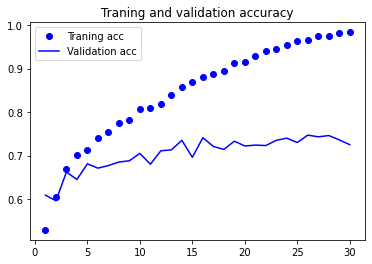

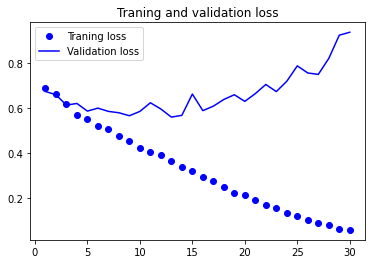

In [2]:
# plot
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Traning acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Traning and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Traning loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Traning and validation loss')
plt.legend()

plt.show()

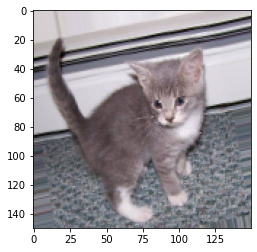

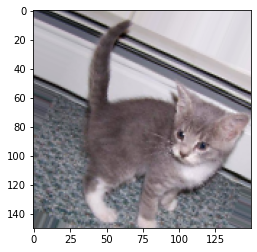

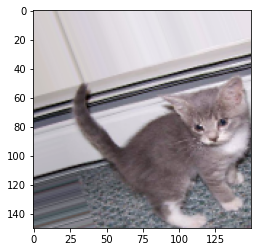

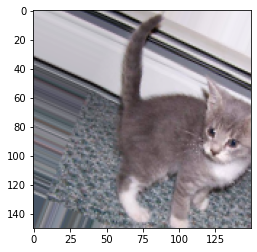

In [4]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

from tensorflow.keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
        
plt.show()